In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from actor_critic import A2C
from actor_nn import Actor
from critic_nn import Critic

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

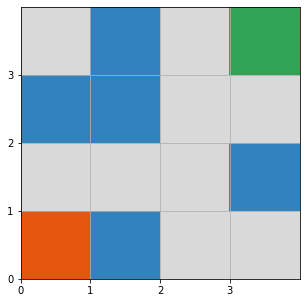

In [3]:
env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=300,
    full_state=True,
)

In [4]:
actor_model = Actor(state_dim=16, action_dim=4)
critic_model = Critic(state_dim=16)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=4,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.001),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.001),
    hyprprms={
        'gamma': 0.995,
    },
    log_freq=300,
)

In [5]:
a2c.run(5000)

Episode: 0, Loss: 0.9621530771255493, Avg. Reward: -1518.849999999995
Episode: 300, Loss: 0.04189596697688103, Avg. Reward: 4.75
Episode: 600, Loss: -0.05144035071134567, Avg. Reward: -25.150000000000002
Episode: 900, Loss: 0.001211359165608883, Avg. Reward: 4.75
Episode: 1200, Loss: 0.0021621210034936666, Avg. Reward: 4.75
Episode: 1500, Loss: 4.4564312702277675e-05, Avg. Reward: 4.75
Episode: 1800, Loss: 0.007226162124425173, Avg. Reward: 4.75
Episode: 2100, Loss: -4.6251986418610613e-07, Avg. Reward: 4.75
Episode: 2400, Loss: -0.0023515941575169563, Avg. Reward: 4.75
Episode: 2700, Loss: -2.8536567697301507e-05, Avg. Reward: 4.75
Episode: 3000, Loss: 1.5892786677795812e-06, Avg. Reward: 4.75
Episode: 3300, Loss: 6.70733061269857e-05, Avg. Reward: 4.75
Episode: 3600, Loss: 0.006174158770591021, Avg. Reward: 4.75
Episode: 3900, Loss: 1.5818210385987186e-06, Avg. Reward: 4.75
Episode: 4200, Loss: 2.0394509192556143e-06, Avg. Reward: 4.75
Episode: 4500, Loss: 1.74977294875589e-08, Avg. 

In [6]:
_, action_seq = dqn.evaluate_one_episode()
dqn.env.animate(action_seq=action_seq, filename='dqn.mp4')
Video('dqn.mp4')

NameError: name 'dqn' is not defined

In [ ]:
dqn.evaluate()

#### Training

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

total_rewards = [log['reward'] for _, log in dqn.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(dqn.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in dqn.logs.items()]
ax[0][1].plot(range(dqn.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(dqn.episodes), [log['epsilon'] for _, log in dqn.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

#### Evaluation

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].plot(range(dqn.eval_episodes), [log['reward'] for _, log in dqn.eval_logs.items()])
ax[0].set_title('Total reward per episode')

ax[1].plot(range(dqn.eval_episodes), [log['cumulative_reward'] for _, log in dqn.eval_logs.items()])
ax[1].set_title('Cumulative reward per episode')